In today's practicals, we will look at two algorithms from the field of swarm intelligence - ant colony optimization and particle swarm optimization.

Both algorithms are relatively easy to implement, so we will write them from scratch.

## Ant Colony Optimization

The ACO algorithm is particularly suitable for combinatorial optimization, specifically for problems that can be converted to finding paths in a graph. As an example, we use ACO to solve the traveling salesman problem, i.e. the problem of finding the shortest Hamiltonian circle in a complete graph.

In [5]:
from collections import namedtuple
import math
import functools

import numpy as np

Vertex = namedtuple('Vertex', ['name', 'x', 'y'])

# main ACO function
def ant_solver(vertices, distance, ants=10, max_iter=3000, alpha=1, beta=3, Q=100, rho=0.8):
    P = initialize_pheromone(len(vertices))
    best_sol = None
    best_fit = float('inf')
    for it in range(max_iter):
        sols = list(generate_solutions(vertices, P, distance, ants, alpha=alpha, beta=beta))
        fits = list(map(lambda x: fitness(vertices, distance, x), sols))
        P = update_pheromone(P, sols, fits, Q=Q, rho=rho)
        
        for s, f in zip(sols, fits):
            if f < best_fit:
                best_fit = f
                best_sol = s
        
        print(f'{it:4}, {np.min(fits):.4f}, {np.mean(fits):.4f}, {np.max(fits):.4f}')
    return best_sol, P

# compute distance
@functools.lru_cache(maxsize=None)
def distance(v1, v2):
    return math.sqrt((v1.x - v2.x)**2+(v1.y - v2.y)**2)

# compute fitness
def fitness(vertices, dist, sol):
    sd = 0
    for x, y in zip(sol, sol[1:]):
        sd += dist(vertices[x], vertices[y])
    sd += dist(vertices[sol[-1]], vertices[sol[0]])
    return sd

# pheromone initizalization
def initialize_pheromone(N):
    return 0.01*np.ones(shape=(N,N))

# generate solution
def generate_solutions(vertices, P, dist, N, alpha=1, beta=3):
    
    # probability of selecting and edge (without scaling)
    def compute_prob(v1, v2):
        nu = 1/dist(vertices[v1], vertices[v2])
        tau = P[v1, v2]
        ret = pow(tau, alpha) * pow(nu,beta)
        return ret if ret > 0.000001 else 0.000001

    V = P.shape[0]
    for i in range(N):
        available = list(range(V))
        sol = [np.random.randint(0, V)]
        available.remove(sol[0])
        while available:
            probs = np.array(list(map(lambda x: compute_prob(sol[-1], x), available)))
            selected = np.random.choice(available, p=probs/sum(probs)) # edge selection
            sol.append(selected)
            available.remove(selected)
        yield sol

def update_pheromone(P, sols, fits, Q=100, rho=0.6):
    ph_update = np.zeros(shape=P.shape)
    for s, f in zip(sols, fits):
        for x, y in zip(s, s[1:]):
            ph_update[x][y] += Q/f
        ph_update[s[-1]][s[0]] += Q/f
    
    return (1-rho)*P + ph_update        

In [6]:
import csv

# we will test the algorithm on european capitals
vertices = []
with open('cities.csv') as cities_file:
    csv_reader = csv.reader(cities_file, delimiter=',')
    for row in csv_reader:
        vertices.append(Vertex(row[0], float(row[2]), float(row[1])))

import pprint
        
pprint.pprint(vertices)

s, P = ant_solver(vertices, distance)

[Vertex(name='Tirana', x=19.81666667, y=41.31666667),
 Vertex(name='Andorra la Vella', x=1.5, y=42.5),
 Vertex(name='Vienna', x=16.36666667, y=48.21666667),
 Vertex(name='Minsk', x=27.55, y=53.9),
 Vertex(name='Brussels', x=4.316666667, y=50.81666667),
 Vertex(name='Sarajevo', x=18.36666667, y=43.85),
 Vertex(name='Sofia', x=23.3, y=42.68333333),
 Vertex(name='Zagreb', x=15.96666667, y=45.8),
 Vertex(name='Nicosia', x=33.36666667, y=35.15),
 Vertex(name='Prague', x=14.41666667, y=50.06666667),
 Vertex(name='Copenhagen', x=12.56666667, y=55.66666667),
 Vertex(name='Tallinn', x=24.73333333, y=59.43333333),
 Vertex(name='Helsinki', x=24.93333333, y=60.16666667),
 Vertex(name='Paris', x=2.333333333, y=48.85),
 Vertex(name='Berlin', x=13.36666667, y=52.51666667),
 Vertex(name='Athens', x=23.71666667, y=37.96666667),
 Vertex(name='Budapest', x=19.06666667, y=47.5),
 Vertex(name='Reykjavik', x=-21.91666667, y=64.13333333),
 Vertex(name='Dublin', x=-6.25, y=53.31666667),
 Vertex(name='Rome', x

 181, 244.9373, 277.1525, 306.2980
 182, 244.9373, 294.0990, 353.3363
 183, 246.1984, 279.7038, 302.0267
 184, 248.1727, 290.9303, 353.8069
 185, 264.8367, 293.0610, 338.2268
 186, 236.3208, 286.5010, 331.6105
 187, 244.9373, 266.3513, 296.8553
 188, 237.5819, 271.7008, 320.9335
 189, 245.8410, 266.6754, 296.9830
 190, 242.8856, 263.3770, 286.4741
 191, 252.6436, 267.7321, 290.1200
 192, 236.3208, 273.2049, 327.4873
 193, 236.3208, 275.1326, 326.6205
 194, 253.3065, 279.3957, 311.7792
 195, 239.3845, 274.7360, 319.7322
 196, 256.1738, 297.2769, 359.3872
 197, 236.3208, 274.2721, 331.3625
 198, 260.9122, 291.2461, 319.8152
 199, 256.0314, 287.2208, 328.5370
 200, 269.6056, 310.1949, 337.3137
 201, 276.8015, 298.3790, 345.8643
 202, 257.4933, 294.3648, 327.4522
 203, 264.3982, 290.8622, 351.8660
 204, 245.8410, 283.8367, 307.3422
 205, 258.9142, 288.6073, 322.3417
 206, 249.8984, 280.5358, 319.7464
 207, 237.1584, 262.9536, 317.3803
 208, 234.7235, 264.0861, 292.6708
 209, 243.7056, 274.

 416, 249.8791, 281.7056, 304.9605
 417, 240.1539, 277.7303, 331.8970
 418, 242.0990, 268.0411, 311.1276
 419, 241.2429, 289.0099, 332.5217
 420, 242.0990, 281.6841, 315.3946
 421, 248.7720, 288.2655, 356.3287
 422, 237.0534, 272.3295, 337.3565
 423, 243.9459, 288.6890, 361.5613
 424, 255.9302, 281.0956, 318.6794
 425, 246.1604, 269.6824, 298.8701
 426, 243.0090, 278.0342, 333.9237
 427, 244.7957, 265.1119, 283.9659
 428, 243.0052, 272.3132, 298.1227
 429, 243.9459, 275.4306, 331.4759
 430, 240.2156, 274.7057, 312.6660
 431, 240.1539, 290.4956, 349.3552
 432, 243.9459, 273.8070, 291.5658
 433, 243.9459, 275.9239, 307.1516
 434, 235.4872, 269.9292, 303.6433
 435, 243.9459, 267.2648, 288.3424
 436, 243.0052, 267.6080, 309.0039
 437, 243.8843, 276.4535, 296.3617
 438, 247.7159, 279.9766, 309.9649
 439, 247.5168, 289.5149, 358.1887
 440, 237.6931, 278.1759, 347.1851
 441, 243.0052, 274.9123, 323.1489
 442, 240.1539, 270.5367, 291.8763
 443, 245.5182, 282.4077, 325.6297
 444, 249.3618, 281.

 651, 245.9115, 286.9477, 312.7996
 652, 234.8133, 289.4114, 372.6888
 653, 233.2160, 293.2227, 349.9092
 654, 239.7632, 289.1540, 391.7732
 655, 234.8133, 258.9704, 293.3504
 656, 243.7420, 275.6732, 302.7999
 657, 234.8133, 266.7775, 311.5981
 658, 243.2568, 260.8208, 279.3698
 659, 242.4772, 266.3309, 284.6843
 660, 245.9115, 269.4725, 289.0111
 661, 237.7836, 264.1249, 309.5250
 662, 236.3856, 278.0309, 343.3201
 663, 236.7990, 265.8258, 309.6015
 664, 250.5271, 277.3437, 336.2914
 665, 236.3856, 270.6518, 300.9767
 666, 236.0744, 269.1982, 328.7908
 667, 253.6987, 285.4637, 324.3967
 668, 236.0744, 263.9802, 295.9401
 669, 234.8133, 274.6942, 335.8815
 670, 233.2160, 272.0492, 317.4419
 671, 242.4772, 263.1775, 294.7444
 672, 237.7836, 270.4252, 345.9204
 673, 239.4251, 269.1176, 319.0396
 674, 234.8133, 272.3987, 317.6389
 675, 234.8133, 261.1069, 306.6541
 676, 237.7836, 267.6822, 302.6223
 677, 234.8133, 257.9923, 313.4352
 678, 242.4772, 260.3716, 291.6233
 679, 234.8133, 269.

 899, 237.0187, 271.2450, 314.8724
 900, 236.8790, 256.3046, 272.4488
 901, 234.1603, 269.6259, 312.0341
 902, 250.8705, 281.1987, 324.5066
 903, 235.7576, 260.7113, 299.5267
 904, 244.1209, 279.9711, 325.4337
 905, 234.1603, 270.5230, 309.2758
 906, 250.8705, 278.7684, 327.6049
 907, 237.0187, 258.4783, 283.2463
 908, 235.7576, 272.1740, 337.8910
 909, 235.7576, 285.0793, 349.0920
 910, 244.1209, 276.2907, 325.4570
 911, 237.0187, 275.6789, 348.9430
 912, 237.0187, 278.8249, 321.0329
 913, 244.1209, 277.7271, 346.2127
 914, 244.2157, 281.0900, 339.1727
 915, 235.7576, 274.0510, 311.0326
 916, 235.7576, 289.3783, 341.1754
 917, 244.7495, 279.1252, 310.6880
 918, 258.5858, 270.5503, 293.0993
 919, 240.7074, 275.2858, 328.8825
 920, 237.0187, 271.1714, 310.5261
 921, 234.1603, 281.6833, 317.0138
 922, 234.1603, 271.6402, 304.3395
 923, 237.3299, 269.7700, 310.1496
 924, 258.6927, 286.7078, 328.1636
 925, 237.0187, 283.9297, 368.8379
 926, 237.3299, 279.2383, 322.1326
 927, 253.4081, 294.

1148, 234.4344, 272.8550, 310.1694
1149, 234.4344, 255.3452, 283.1159
1150, 237.6040, 260.3196, 275.4590
1151, 254.5739, 270.0992, 305.6003
1152, 236.0317, 266.2528, 308.0481
1153, 248.7469, 271.1199, 296.7486
1154, 236.0317, 278.8808, 334.7239
1155, 236.0317, 267.2259, 301.9821
1156, 236.0317, 269.2876, 306.4011
1157, 236.0317, 266.1729, 304.6291
1158, 233.0688, 268.3643, 299.7856
1159, 252.7468, 277.9776, 311.7412
1160, 254.5728, 282.4875, 305.9891
1161, 236.9695, 273.4717, 323.8203
1162, 240.9815, 269.2398, 304.3936
1163, 256.8865, 282.9368, 312.2056
1164, 240.9815, 280.7582, 326.4030
1165, 245.3579, 269.7773, 305.9452
1166, 256.3322, 291.1280, 315.2531
1167, 242.6329, 288.2734, 306.9428
1168, 236.0317, 301.8167, 353.4172
1169, 277.1430, 295.9822, 310.5452
1170, 254.1048, 286.3112, 310.8700
1171, 247.1299, 294.0879, 366.1331
1172, 237.2928, 273.7200, 314.6080
1173, 246.4110, 288.6872, 335.3640
1174, 241.8014, 287.7371, 320.2717
1175, 244.2308, 301.0900, 351.7610
1176, 238.5955, 300.

1386, 236.0317, 292.3720, 347.0255
1387, 245.3579, 300.0445, 338.2128
1388, 236.0317, 277.8690, 306.2323
1389, 254.2584, 280.7914, 321.9256
1390, 236.0317, 279.0785, 325.7703
1391, 234.4344, 274.5136, 314.6803
1392, 263.7166, 282.8196, 324.1824
1393, 236.0317, 277.2709, 356.7923
1394, 236.0317, 265.6880, 327.1227
1395, 236.0317, 279.2746, 326.5385
1396, 243.7968, 280.0751, 340.1673
1397, 270.9695, 288.6197, 322.1790
1398, 234.4344, 283.5449, 333.1522
1399, 247.1299, 280.6629, 328.4984
1400, 236.0317, 288.4465, 337.3492
1401, 236.0317, 271.3178, 309.5832
1402, 240.9815, 258.2891, 304.1137
1403, 237.6040, 284.6860, 373.5747
1404, 234.4344, 266.6488, 337.3387
1405, 234.4344, 268.4209, 319.2819
1406, 237.6040, 261.5972, 300.4062
1407, 237.2928, 256.6874, 276.6566
1408, 234.4344, 278.3734, 350.6739
1409, 237.2928, 278.4848, 297.5732
1410, 251.2315, 305.3551, 370.7414
1411, 236.0317, 274.8521, 343.7642
1412, 243.6589, 265.8398, 307.8466
1413, 236.0317, 267.9247, 305.6743
1414, 236.0317, 270.

1624, 236.0485, 291.0004, 344.4838
1625, 240.8263, 281.7966, 323.1055
1626, 242.3509, 265.7853, 285.5325
1627, 237.8425, 267.3252, 292.1135
1628, 252.6840, 274.4510, 296.7025
1629, 236.8575, 276.0387, 315.9934
1630, 241.6631, 268.9111, 363.7507
1631, 236.9695, 262.8976, 295.0352
1632, 233.9992, 260.9596, 283.5345
1633, 238.9490, 279.6505, 363.1916
1634, 233.9992, 265.6815, 318.5183
1635, 235.5715, 267.9215, 306.1281
1636, 251.7997, 288.3423, 347.0899
1637, 260.3897, 295.6596, 343.3427
1638, 237.5804, 283.8358, 338.8708
1639, 237.5804, 286.2720, 332.0255
1640, 251.4639, 290.0582, 306.0634
1641, 238.1022, 292.1840, 325.4252
1642, 248.4650, 291.0487, 332.8683
1643, 238.1022, 291.4540, 320.9875
1644, 246.5408, 293.8352, 328.5858
1645, 241.0489, 290.2874, 331.8039
1646, 245.1997, 275.2403, 308.6275
1647, 253.9253, 295.8571, 345.2980
1648, 255.5718, 292.7948, 360.9874
1649, 265.9376, 284.1543, 328.5985
1650, 248.2395, 279.7999, 332.3486
1651, 252.6519, 288.7352, 316.5115
1652, 244.6104, 280.

1860, 235.9564, 265.7981, 308.4658
1861, 232.4019, 273.4488, 353.6850
1862, 240.2768, 271.9468, 308.6363
1863, 232.4019, 261.7925, 285.5337
1864, 238.9490, 257.6282, 281.6716
1865, 232.4019, 264.4677, 301.9051
1866, 232.4019, 265.0680, 310.3023
1867, 246.5235, 268.6843, 289.6473
1868, 239.2136, 272.6463, 328.8899
1869, 241.6631, 272.2634, 298.1912
1870, 263.7100, 282.9156, 332.7007
1871, 232.4019, 261.9016, 295.1221
1872, 235.2603, 272.5300, 318.8331
1873, 235.2603, 273.2136, 315.8831
1874, 232.4019, 276.9083, 362.8658
1875, 243.1600, 269.6752, 311.8770
1876, 247.6327, 259.0629, 284.3236
1877, 251.1071, 278.6564, 335.3748
1878, 232.4019, 274.8663, 344.1775
1879, 235.5715, 283.9361, 321.2848
1880, 241.6631, 259.4027, 324.1635
1881, 232.4019, 269.8691, 317.8605
1882, 232.4019, 269.4304, 350.6586
1883, 232.4019, 262.6123, 293.6964
1884, 233.9992, 265.2743, 298.1379
1885, 233.9992, 265.4349, 309.4193
1886, 233.9992, 262.8405, 304.2622
1887, 238.9490, 287.1838, 332.7216
1888, 247.6327, 275.

2103, 234.4344, 255.4147, 314.8027
2104, 237.1769, 256.9636, 287.7646
2105, 234.4344, 251.7207, 271.4100
2106, 237.1769, 269.0146, 333.9726
2107, 244.8108, 262.9172, 285.8762
2108, 249.2043, 270.6917, 319.9292
2109, 234.4344, 264.2688, 283.3312
2110, 246.9533, 265.7096, 283.3363
2111, 234.4344, 264.9447, 326.7482
2112, 234.4344, 284.2381, 346.6341
2113, 234.4344, 254.9410, 293.2726
2114, 234.4344, 256.6590, 296.8947
2115, 234.4344, 259.7263, 287.5465
2116, 234.4344, 275.5398, 348.5755
2117, 234.4344, 263.5496, 299.9794
2118, 234.4344, 262.0607, 294.4210
2119, 234.4344, 273.4277, 335.0632
2120, 234.4344, 261.3244, 300.6258
2121, 234.4344, 261.0077, 285.6235
2122, 234.4344, 256.2092, 301.8587
2123, 234.4344, 267.7837, 321.3412
2124, 234.4344, 255.5357, 310.1124
2125, 234.4344, 285.3671, 344.2619
2126, 234.4344, 273.1556, 312.1375
2127, 234.4344, 269.8624, 305.0567
2128, 234.4344, 267.2348, 299.4944
2129, 240.0162, 267.8929, 349.2959
2130, 234.4344, 248.6519, 288.1177
2131, 237.6040, 268.

2348, 239.6719, 287.0098, 333.5098
2349, 235.1441, 275.1875, 314.9766
2350, 236.5095, 278.2007, 326.3979
2351, 235.1441, 271.2487, 315.1959
2352, 239.1794, 274.2666, 320.7982
2353, 235.1441, 273.9715, 316.3871
2354, 235.1441, 276.7297, 320.6878
2355, 235.1441, 278.5818, 323.2858
2356, 258.6366, 282.9192, 329.8028
2357, 239.1794, 278.1515, 344.8439
2358, 242.5205, 271.3473, 339.3409
2359, 243.6255, 297.3223, 351.4112
2360, 243.5354, 289.0366, 354.8151
2361, 239.5248, 286.8284, 339.4778
2362, 243.6255, 270.8468, 322.4732
2363, 242.7997, 270.7108, 305.4537
2364, 255.6979, 269.4655, 285.3765
2365, 232.4019, 270.5626, 336.2875
2366, 243.6255, 266.2970, 308.2776
2367, 251.3001, 271.5469, 333.4897
2368, 241.8855, 280.5167, 328.4837
2369, 244.8265, 292.0657, 360.5363
2370, 236.9362, 284.1961, 365.1143
2371, 247.6327, 269.1094, 292.7881
2372, 247.6327, 287.4912, 351.2401
2373, 242.0954, 278.0971, 338.8146
2374, 246.3364, 294.7195, 360.5187
2375, 245.3492, 278.9943, 336.3404
2376, 241.6631, 281.

2584, 252.1349, 293.8231, 335.7973
2585, 250.8738, 299.1747, 335.3161
2586, 261.9720, 302.9546, 352.3263
2587, 270.3104, 316.0771, 371.0697
2588, 250.8738, 291.1683, 330.2902
2589, 250.8738, 294.1478, 344.1759
2590, 260.8833, 287.3669, 324.6869
2591, 250.8738, 281.7737, 320.2514
2592, 252.4461, 292.7090, 328.6759
2593, 263.3314, 282.3567, 310.2976
2594, 252.1349, 286.9647, 310.2178
2595, 261.9720, 296.1704, 323.8426
2596, 271.4499, 293.7423, 320.2700
2597, 250.8738, 284.8007, 317.9019
2598, 252.1349, 299.8555, 346.0650
2599, 273.4240, 301.4319, 344.8616
2600, 255.8236, 301.0112, 332.9252
2601, 259.5329, 291.6986, 311.2165
2602, 264.0693, 288.3021, 307.1562
2603, 265.8625, 294.2129, 328.1939
2604, 266.2390, 294.8660, 324.0230
2605, 266.2390, 293.3553, 328.0007
2606, 250.8738, 288.3196, 343.6876
2607, 254.0524, 291.6239, 378.1795
2608, 250.8738, 292.5876, 361.3553
2609, 250.8738, 288.7722, 329.0436
2610, 249.2765, 292.3774, 331.7195
2611, 254.8947, 288.4382, 344.4434
2612, 252.3637, 290.

2824, 286.1539, 311.3732, 356.1530
2825, 278.3785, 307.9597, 353.3238
2826, 271.8753, 320.7125, 372.3993
2827, 279.0605, 312.1601, 351.0010
2828, 273.5130, 307.4390, 350.6132
2829, 279.0605, 300.2115, 326.4385
2830, 279.0605, 303.5200, 322.7428
2831, 286.1345, 304.7789, 336.4137
2832, 285.5747, 301.9134, 342.4854
2833, 280.2545, 294.2600, 320.1423
2834, 279.6179, 299.6872, 342.6368
2835, 271.8753, 300.2559, 350.1702
2836, 271.8753, 309.6695, 385.5169
2837, 280.2545, 306.5184, 350.3528
2838, 280.2545, 303.5855, 337.4239
2839, 280.2545, 310.6219, 378.1577
2840, 280.2545, 312.2776, 347.7361
2841, 279.7635, 294.4846, 326.4856
2842, 271.6999, 297.9667, 341.1311
2843, 279.7322, 293.8805, 322.3949
2844, 279.7914, 296.7973, 338.0018
2845, 288.0611, 303.1758, 324.5607
2846, 279.7635, 298.5837, 347.7553
2847, 279.8534, 297.2704, 314.0105
2848, 279.7322, 297.4527, 349.2658
2849, 278.8214, 294.1084, 333.8470
2850, 278.0563, 304.2729, 345.5407
2851, 277.0254, 308.6225, 354.4759
2852, 279.8823, 312.

We plot the solution and the amount of pheromone on the individual edges. By uncommenting the commented line, you can test how different `alpha` and `beta` settings affect the solutions found.

Fitness:  229.89781833458835
[Vertex(name='Zagreb', x=15.96666667, y=45.8),
 Vertex(name='Ljubljana', x=14.5, y=46.05),
 Vertex(name='San Marino', x=12.41666667, y=43.93333333),
 Vertex(name='Rome', x=12.5, y=41.88333333),
 Vertex(name='Vatican City', x=12.45, y=41.9),
 Vertex(name='Monaco', x=7.416666667, y=43.73333333),
 Vertex(name='Bern', x=7.433333333, y=46.95),
 Vertex(name='Vaduz', x=9.516666667, y=47.13333333),
 Vertex(name='Luxemburg', x=6.116666667, y=49.61666667),
 Vertex(name='Brussels', x=4.316666667, y=50.81666667),
 Vertex(name='Amsterdam', x=4.883333333, y=52.36666667),
 Vertex(name='Paris', x=2.333333333, y=48.85),
 Vertex(name='Andorra la Vella', x=1.5, y=42.5),
 Vertex(name='Madrid', x=-3.7, y=40.41666667),
 Vertex(name='Lisbon', x=-9.133333333, y=38.71666667),
 Vertex(name='London', x=-7.0, y=51.5),
 Vertex(name='Dublin', x=-6.25, y=53.31666667),
 Vertex(name='Reykjavik', x=-21.91666667, y=64.13333333),
 Vertex(name='Oslo', x=10.75, y=59.9),
 Vertex(name='Copenhagen

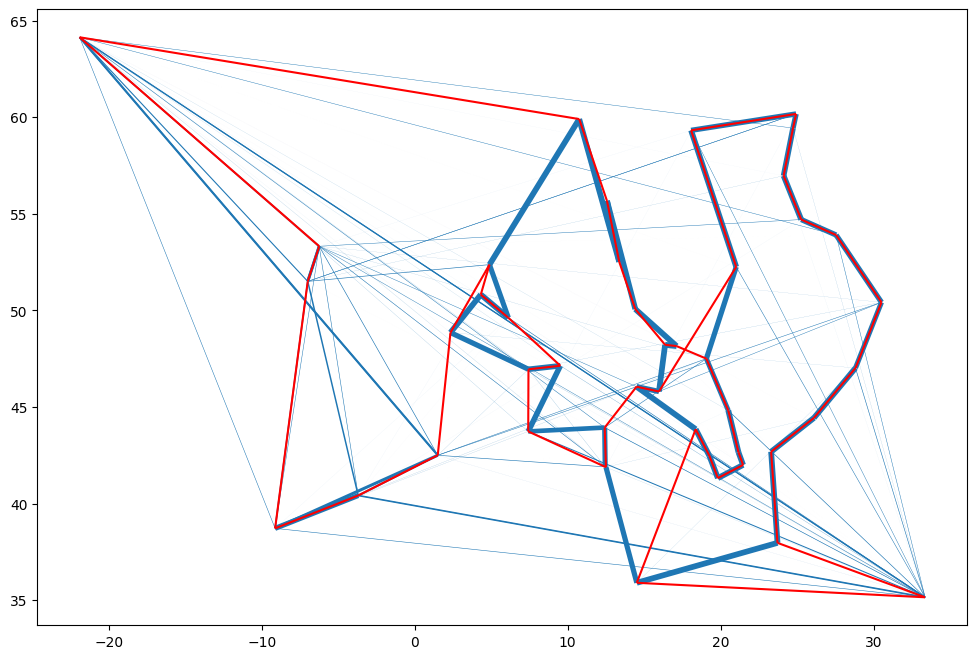

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import collections as mc

# plot the pheromone in blue, line width expresses the amount of pheromone on each edge
lines = []
colors = []
for i, v1 in enumerate(vertices):
    for j, v2 in enumerate(vertices):
        lines.append([(v1.x, v1.y), (v2.x, v2.y)])
        colors.append(P[i][j])

lc = mc.LineCollection(lines, linewidths=np.array(colors))

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.add_collection(lc)
ax.autoscale()

best_sol = s # save the best solution (for the experiments below)

sol = best_sol

# we can test the effect of the parameters on the solution here
# sol = list(generate_solutions(vertices, P, distance, N=1, alpha=3, beta=1))[0]

# print the fitness of the solution
print('Fitness: ', fitness(vertices, distance, sol))

# print the order of the cities
sol_verts = [vertices[i] for i in sol]
pprint.pprint(sol_verts)

# plot the solution in red
sol_lines = []
for i, j in zip(sol, sol[1:]):
    sol_lines.append([(vertices[i].x, vertices[i].y), (vertices[j].x, vertices[j].y)])

sol_lines.append([(vertices[sol[-1]].x, vertices[sol[-1]].y), (vertices[sol[0]].x, vertices[sol[0]].y)])

sols_lc = mc.LineCollection(sol_lines, colors='red')
ax.add_collection(sols_lc)

## Particle Swarm Optimization

The PSO algorithm is also very simple to implement - we just need to rewrite the equations.

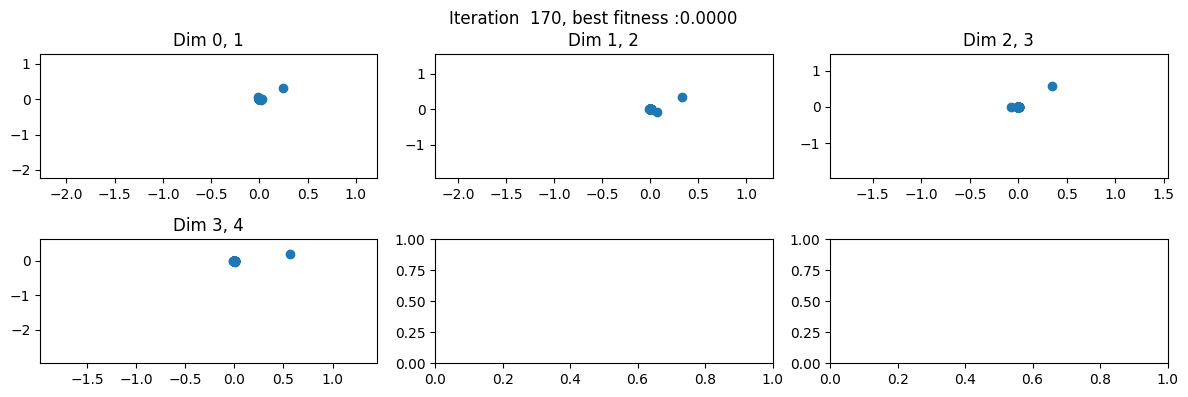

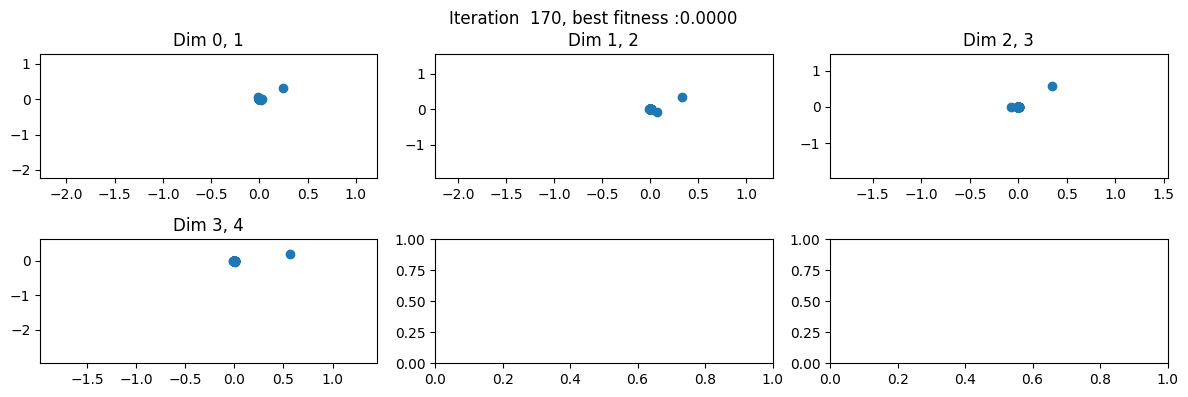

In [11]:
class Particle:
    def __init__(self, x, v):
        self.x = x
        self.v = v
        self.p_best = x
            
    def __repr__(self):
        return str(self.x) + ', ' + str(self.v) + ', ' + str(self.p_best)

# simple fitness for testing
def fitness(x):
    return np.linalg.norm(x)

# main PSO implementation
def pso(fitness, swarm_size, problem_dim, max_iters, plot_speed=10):
    swarm = init_swarm(N=swarm_size, D=problem_dim)
    g_best = compute_gbest(swarm, fitness)
    min_limits, max_limits = None, None
    
    for it in range(max_iters):
        swarm = update_swarm(swarm, fitness, g_best)
        g_best = compute_gbest(swarm, fitness)
        #print(f'{it:4}: {fitness(g_best):.4f}')
        
        if it % plot_speed == 0:
            fig.suptitle(f'Iteration {it:4}, best fitness :{fitness(g_best):.4f}')
            min_limits, max_limits = plot_swarm(swarm, min_limits, max_limits)
    
    return g_best

# random swarm initialization - locations and velocities
def init_swarm(N, D):
    swarm = []
    for _ in range(N):
        swarm.append(Particle(x = 5 * np.random.uniform(size=(1,D)) - 2.5, v = 0.2*np.random.uniform(size=(1,D)) - 0.1))
    return swarm

# global best update
def compute_gbest(swarm, fit):
    return min(swarm, key=lambda x: fit(x.p_best)).p_best

# swarm update - the main part of the algorithm
def update_swarm(swarm, fit, g_best, phi_p=1, phi_b=0.5, omega=0.95):
    for p in swarm:
        p.v = omega*p.v + phi_p*(p.p_best - p.x) + phi_b*(g_best - p.x)
        p.x = p.x + p.v
        
        if fit(p.x) < fit(p.p_best):
            p.p_best=p.x
    return swarm


""" *** plotting stuff *** """
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
img = OffsetImage(plt.imread('bird.png', format="jpg"), zoom=.04)

from time import sleep
def plot_swarm(swarm, min_limits, max_limits):
    was_none = min_limits is None
    if was_none:
        min_limits, max_limits = np.zeros((problem_dim,)), np.zeros((problem_dim,))
    
    for i in range(problem_dim):
        row = i // cols
        col = i % cols

        if i + 1 == problem_dim:
            break

        axs[row, col].cla()

        xdata, ydata = [p.x[0][i] for p in swarm], [p.x[0][i + 1] for p in swarm]
        if was_none:
            min_limits[i], max_limits[i] = np.min(xdata) - 1, np.max(xdata)
            min_limits[i + 1], max_limits[i + 1] = np.min(ydata) - 1, np.max(ydata)
        else:
            axs[row, col].set_xlim(min_limits[i], max_limits[i])
            axs[row, col].set_ylim(min_limits[i + 1], max_limits[i + 1])        
        
        axs[row, col].set_title(f"Dim {i}, {i + 1}" if i + 1 < problem_dim else "")

        """# Extreme procrastination follows
        for ii, (x0, y0) in enumerate(zip(xdata, ydata)):
            if ii % 10 != 0:
                continue
            ab = AnnotationBbox(img, (x0, y0), frameon=False, annotation_clip=True, pad=0)
            axs[row, col].add_artist(ab)
        """
        
        
        axs[row, col].scatter(xdata, ydata)

    fig.canvas.draw()
    hfig.update(fig)
    sleep(0.3)

    return min_limits, max_limits

cols = 3
problem_dim = 5

fig, axs = plt.subplots(nrows=(problem_dim - 2) // cols + 1, ncols=cols, figsize=(12, 4))
axs = axs if len(axs.shape) > 1 else axs.reshape(1, -1)

i = 0
for rows in axs:
    for ax in rows:
        ax.set_title(f"Dim {i}, {i + 1}" if i + 1 < problem_dim else "")
        i += 1

fig.suptitle('')
fig.tight_layout()
hfig = display(fig, display_id=True)
""" *** plotting stuff *** """

pso(fitness, swarm_size=100, problem_dim=problem_dim, max_iters=180, plot_speed=10)
print()